In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'gen_data/landmark.csv'
#model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
model_save_path = 'gen_model/landmark.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])"""

"\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Input((21 * 2, )),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(20, activation='relu'),\n    tf.keras.layers.Dropout(0.4),\n    tf.keras.layers.Dense(10, activation='relu'),\n    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')\n])"

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 40)                1720      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 9)                 9

In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
75/79 [===========================>..] - ETA: 0s - loss: 2.1354 - accuracy: 0.1658
Epoch 1: saving model to gen_model\landmark.hdf5
79/79 [==============================] - 1s 4ms/step - loss: 2.1261 - accuracy: 0.1697 - val_loss: 1.8007 - val_accuracy: 0.3934
Epoch 2/1000
69/79 [=========================>....] - ETA: 0s - loss: 1.6727 - accuracy: 0.3657
Epoch 2: saving model to gen_model\landmark.hdf5
79/79 [==============================] - 0s 2ms/step - loss: 1.6473 - accuracy: 0.3737 - val_loss: 1.1626 - val_accuracy: 0.7191
Epoch 3/1000
71/79 [=========================>....] - ETA: 0s - loss: 1.2762 - accuracy: 0.5158
Epoch 3: saving model to gen_model\landmark.hdf5
79/79 [==============================] - 0s 2ms/step - loss: 1.2678 - accuracy: 0.5187 - val_loss: 0.7542 - val_accuracy: 0.8839
Epoch 4/1000
72/79 [==========================>...] - ETA: 0s - loss: 1.0605 - accuracy: 0.5965
Epoch 4: saving model to gen_model\landmark.hdf5
79/79 [==========================

In [13]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

27/27 [==============================] - 0s 923us/step - loss: 0.0087 - accuracy: 0.9997


In [14]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [15]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.0723945e-05 9.9990880e-01 1.2860550e-23 0.0000000e+00 0.0000000e+00
 5.2166735e-07 1.1927386e-20 1.5995504e-16 0.0000000e+00]
1


# 混同行列

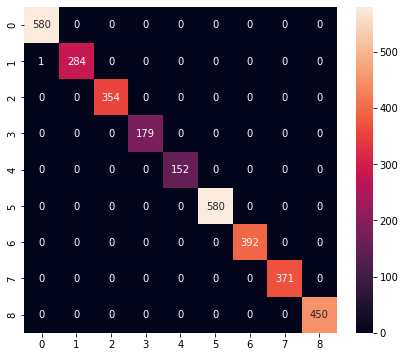

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       580
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       179
           4       1.00      1.00      1.00       152
           5       1.00      1.00      1.00       580
           6       1.00      1.00      1.00       392
           7       1.00      1.00      1.00       371
           8       1.00      1.00      1.00       450

    accuracy                           1.00      3343
   macro avg       1.00      1.00      1.00      3343
weighted avg       1.00      1.00      1.00      3343



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [17]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [18]:
# モデルを変換(量子化)
#tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
tflite_save_path = 'gen_model/landmark.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\giang\AppData\Local\Temp\tmpsmub62c4\assets


8768

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.28624504e-05 9.99906659e-01 1.31253841e-23 0.00000000e+00
 0.00000000e+00 5.20322715e-07 1.22972475e-20 1.54870273e-16
 0.00000000e+00]
1
